# 概念
- 梯度是向量，和参数维度一样。简单地来说，多元函数的导数(derivative)就是梯度(gradient)，分别对每个变量进行微分，然后用逗号分割开，梯度是用括号包括起来，说明梯度其实是一个向量。

- 计算过程：
    - ①、对各参数求偏导，得出 $\triangledown f$；
    - ②、设置初始参数向量、学习率 η及阈值；
    - ③、下个参数向量=上一个参数向量-η*$\triangledown f$；
    - ④、直到$\triangledown f$≤阈值停止，此时寻找到参数向量是局部最优解。

# 手工代码实现

## 一元函数
 $f(x)=3x^2+5x$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def loss_function(x):
    return 3*(x**2)+5*x

def det_function(x):
    return 6*x+5

In [3]:
def get_GD(od_f=None,f=None,x_0=None,eta=0.001,threshold=0):
    x_all=[]
    od_f_all=[]
    det_f_all=[]
    count_n=0
    while True:
        count_n+=1
        y=od_f(x_0)
        #计算导数在x处的值
        det_f=f(x_0)     
        od_f_all.append(y)
        x_all.append(x_0)
        det_f_all.append(det_f)
        #计算下一个点的值
        x_0=x_0-eta*det_f
        #判断是否到达目的地
        if det_f<=threshold:
            break
            
    return x_all,od_f_all,det_f_all,count_n


In [13]:
x,y,dety,n=get_GD(loss_function,det_function,x_0=1,eta=0.1,threshold=0.0001)

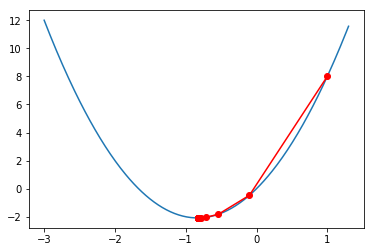

In [14]:
plot_x = np.linspace(-3,1.3,300)
plot_y = loss_function(plot_x)
plt.plot(plot_x,plot_y)
plt.plot(x,y, color='red', marker='o')
plt.show()

## 多元方程式
 - $f(x)=β_{0}+β_{1}x_{1}+β_{2}x_{2}+...+β_{i}x_{i}$
 - 向量化后梯度：$\triangledown J(θ)=\frac{1}{m} X_{b}^{T}(X_{b}θ-y)$
 - 把代码封装在线性回归代码中

In [ ]:
def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
    """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"
    
    def J(theta, X_b, y):
        try:
            return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
        except:
            return float('inf')
    
    def dJ(theta, X_b, y):
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)
    
    
    def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

        theta = initial_theta
        cur_iter = 0

        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y)
            last_theta = theta
            theta = theta - eta * gradient
            if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                break

            cur_iter += 1

        return theta
    
    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    initial_theta = np.zeros(X_b.shape[1])
    self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

    self.intercept_ = self._theta[0]
    self.coef_ = self._theta[1:]

    return self
    

In [13]:
# 用小例子验证我们的代码
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [44]:
from myML_Algorithm.LinearRegression import linearRegression as LR
from myML_Algorithm.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

lr = LR()
lr.fit_gd(X_train, y_train)
lr.coef_

D:\tool\anaconda\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
E:\Data analysis\machinelearning\机器学习小组二期\代码\myML_Algorithm\LinearRegression.py:43: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
E:\Data analysis\machinelearning\机器学习小组二期\代码\myML_Algorithm\LinearRegression.py:60: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [45]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

lr.coef_全是NAN值，是由于数据值大小不一致，存在极大值和极小值。解决方法是数据做归一化处理。因此在使用梯度下降前需要对数据进行归一化处理

In [46]:
# 归一化处理后
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = standardScaler.transform(X_train)

lr.fit_gd(X_train_std, y_train)
print(lr.coef_)
X_test_std = standardScaler.transform(X_test)


[-1.04042202  0.83093351 -0.24794356  0.01179456 -1.35034756  2.25074
 -0.66384353 -2.53568774  2.25572406 -2.34011572 -1.76565394  0.70923397
 -2.72677064]


## 随机梯度下降
- 日常工作中，我们遇到的数据往往特别大，如果采取传统的梯度下降算法系统运行时间会特别长，而且我们找到的是局部最优解。于是，我们采取随机梯度下降方法，可以减少运行时间也能找到全局最优解

In [42]:
def fit_sgd(self, X_train, y_train, n_iters=50, t0=5, t1=50):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert n_iters >= 1

        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters=5, t0=5, t1=50):

            def learning_rate(t):
                return t0 / (t + t1)

            theta = initial_theta
            m = len(X_b)
            for i_iter in range(n_iters):
                # 将原本的数据随机打乱，然后再按顺序取值就相当于随机取值
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes,:]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(i_iter * m + i) * gradient

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

array([-1.04042202,  0.83093351, -0.24794356,  0.01179456, -1.35034756,
        2.25074   , -0.66384353, -2.53568774,  2.25572406, -2.34011572,
       -1.76565394,  0.70923397, -2.72677064])

# sklearn中的SGD

In [58]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()    # 默认n_iter=5
%time sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std, y_test)

Wall time: 168 ms


D:\tool\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8032440859338719

In [59]:
# 增加迭代次数
sgd_reg = SGDRegressor(n_iter=100)
%time sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std, y_test)

Wall time: 3.99 ms


D:\tool\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8127865478262196

速度非常快！增加迭代次数，可以提升效果